# Stochastic Gradient Descent of Linear Regression

The goal of this project will be to utilize Stochastic Gradient Descent of linear regression to predict the least crowded time to go to the gym. The data utilized has over 60,000 observations and 11 features including day, hour, temperature and more. We want to see if some combination of these features produces a good linear model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

# importing libraries

In [2]:
data = pd.read_csv("crowdness_gym_data.csv")
data.head()

# importing data and reviewing top 5 rows

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
data.info()

# checking data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
data.describe()

# reviewing the distribution of variables

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
data.corr()

# reviewing the correlations for useful features

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


Based on the correlation of variables above we can see hour, is_during_semester and temperature all have decent correlations. timestamp should be somewhat redundant to hour which we see in the correlation. We will proceed with these 3 variables in hour model

In [6]:
semester = data.groupby("is_during_semester")["number_people"].mean()
hour = data.groupby("hour")["number_people"].mean()
temp = data.groupby("temperature")["number_people"].mean()

# creating dfs to plot average total PN at gym by our features

<AxesSubplot:xlabel='is_during_semester'>

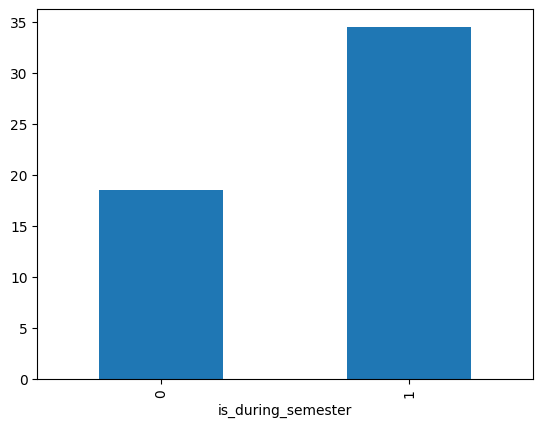

In [7]:
semester.plot(kind = "bar")

<AxesSubplot:xlabel='hour'>

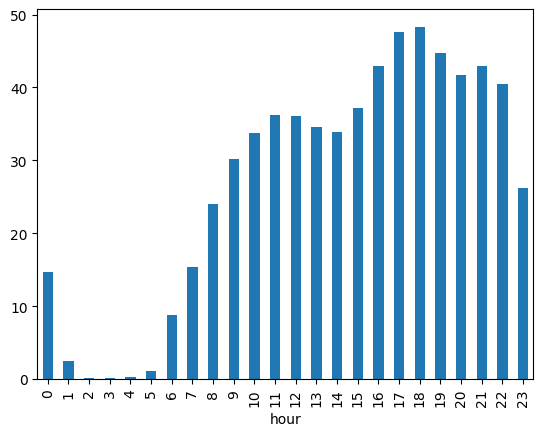

In [8]:
hour.plot(kind = "bar")

<AxesSubplot:xlabel='temperature'>

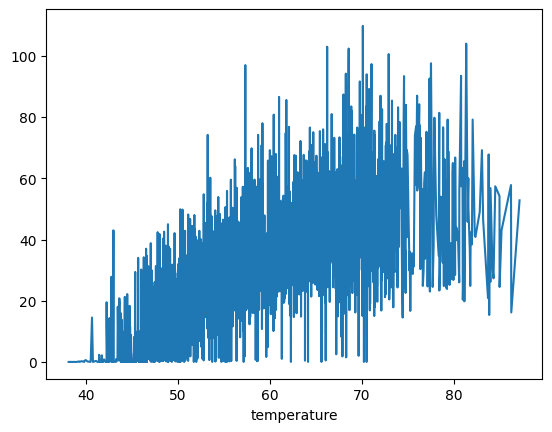

In [9]:
temp.plot(kind = "line")

Per the distributions above it appears early morning (not midnight or 1 AM), not during the semester and when it's cold out all correlate with low gym attendance.

### Building the Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# importing needed packages

In [11]:
X = data[["hour", "is_during_semester", "temperature"]]
y = data["number_people"]

# splitting the data into features and a predictor

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 44)

# splitting data into the training and test sets

In [13]:
sgd = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, tol = 1e-4, max_iter = 25)

# Creating the SGD parameters

In [14]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# updating scaler to our model values

In [15]:
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

# training the model and calculating predicted values

### Evaluating model performance

In [16]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAE = mean_absolute_error(y_test, y_pred)
RSQ = r2_score(y_test, y_pred)

# calculating stat metrics to evaluate the model performance

In [17]:
print(f"Root Mean squared error is {RMSE} \nMean Absolute error {MAE} \nR-Squared is {RSQ}")

# printing the metrics calculated above

Root Mean squared error is 16.625501159982033 
Mean Absolute error 12.787592839704358 
R-Squared is 0.4499742791870731


Based on the metrics above, the model isn't terrible but isn't great. The Root mean squared error is 16 people and the standard deviation for number of people is 23. We want R-Squared to be close to 1 and it is .45

### Visualizing the Model Performance

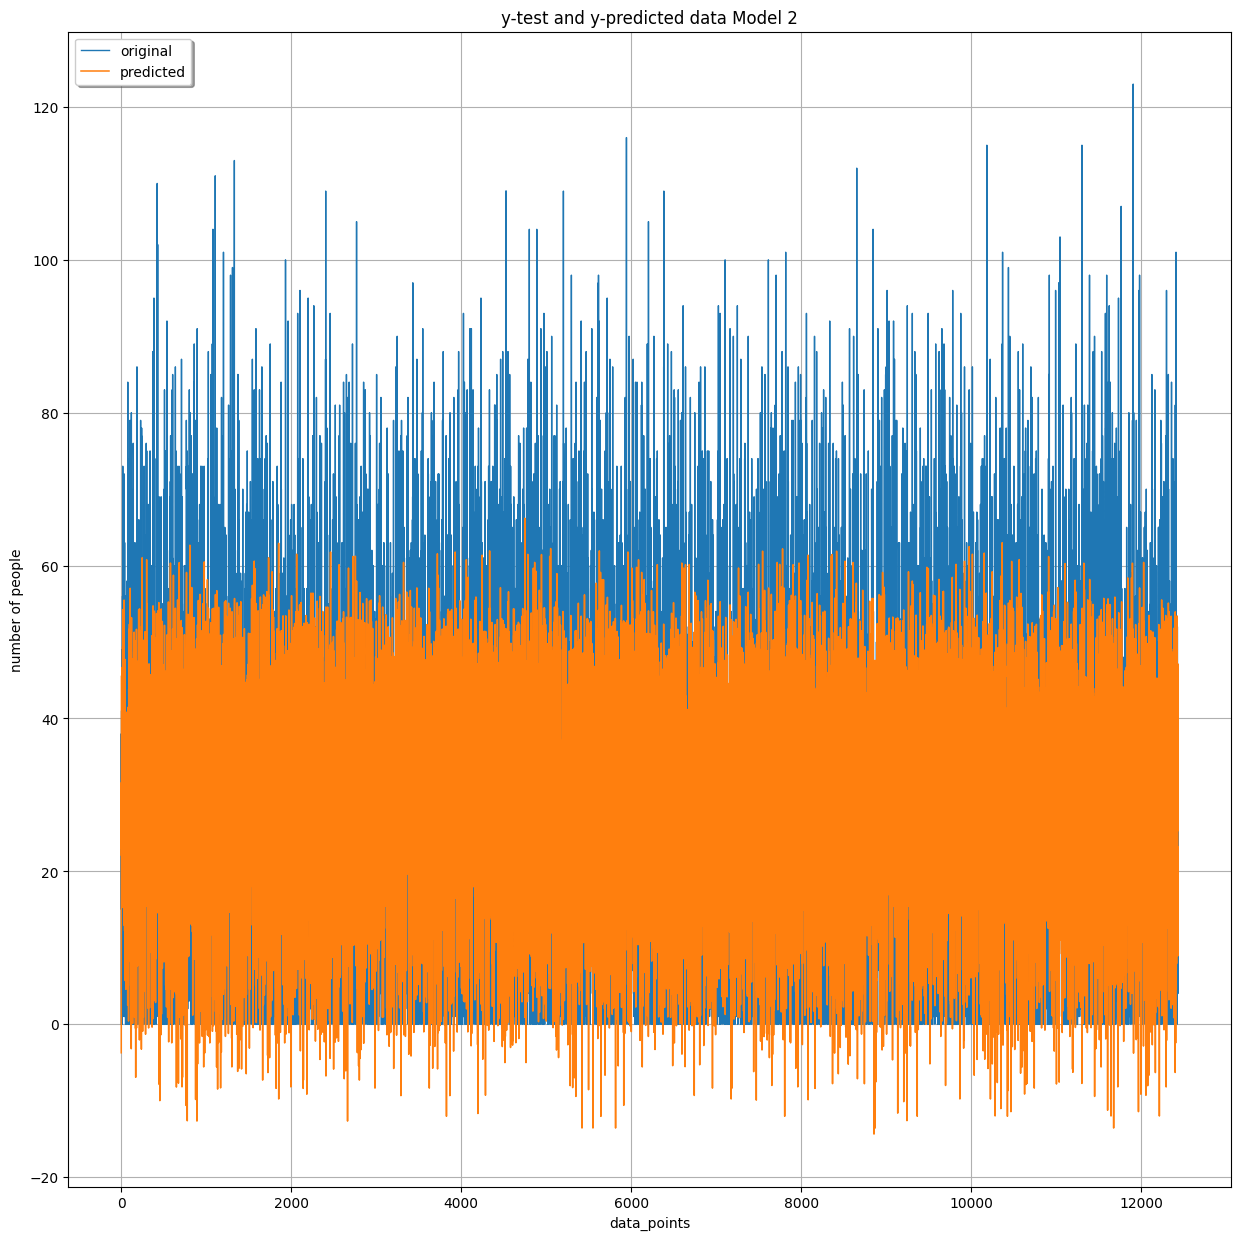

In [18]:
plt.figure(figsize=(15, 15))

x = range(len(y_test))
plt.plot(x, y_test, linewidth=1, label="original")
plt.plot(x, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('data_points')
plt.ylabel('number of people')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# creating a line graph to visualize the actual values vs predicted on our test set

### Summarizing Results

Based on the results RSME, R_Squared and absolute error the model isn't great but not terrible. Our visualziation of the model performance shows it often has lower predictions than the true values. We can experiement with other hyperparameter or features to see if we get different results. We saw initally the colder the weather, if a semester is not in and early morning are all decent predictors of low gym attendance; however, using a combination of all three features does not produce more accurate predictions.